<a href="https://colab.research.google.com/github/priscilla1812/Marketing-Campaign-Performance-Insights/blob/main/Marketing_Campaign_Performance_Insights_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:**

Marketing Campaign Performance Insights

**Problem Statement:**

In the highly competitive landscape of digital marketing, effectively evaluating the success of
various marketing campaigns is essential for optimizing return on investment (ROI) and
improving overall performance. Despite having extensive data on multiple campaigns, there
is a need for a thorough analysis to assess and compare key metrics such as conversion
rates, acquisition costs, and ROI across different campaign types, channels, and audience
segments. This project aims to uncover actionable insights by examining temporal trends,
geographical influences, and audience responses to identify factors driving campaign
success and provide recommendations for enhancing future marketing strategies.

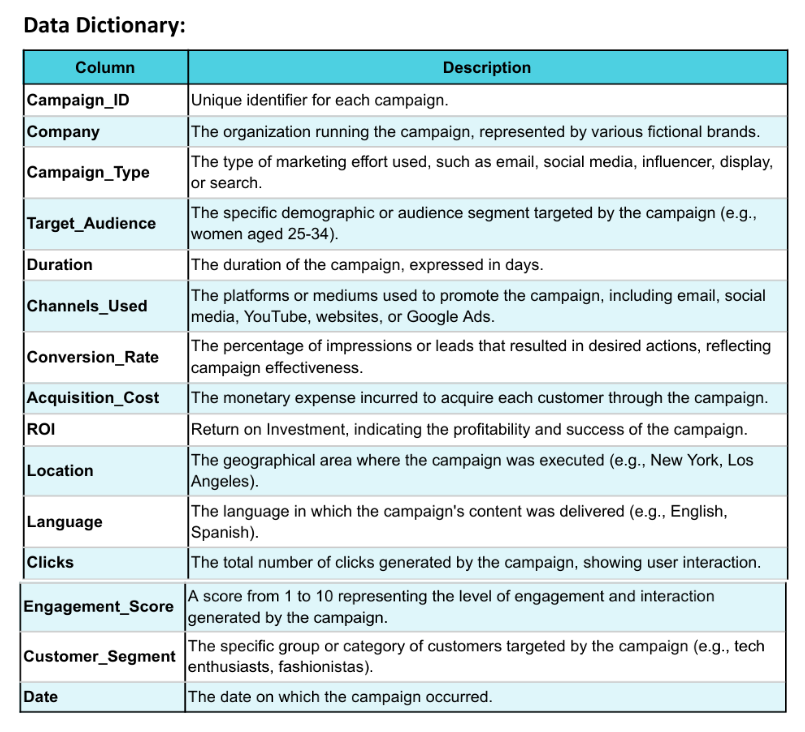

# Project Steps:

## 1) Load the Dataset

In [ ]:
import pandas as pd

# Read the marketing campaign data from the CSV file into a pandas DataFrame and Load dataset
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df = pd.read_csv(url)

## 2) Descriptive Analysis

### Basic Structure

In [ ]:
# Print the first few rows of the dataset to get an overview of the data
df.head() # Preview

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [ ]:
# Obtain the number of rows and columns in the dataset
print("Rows and Columns:", df.shape)

Rows and Columns: (22029, 16)


In [ ]:
# Get a concise summary of the dataset, including the data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [ ]:
# Generate descriptive statistics for numerical columns
df.describe()   # Summary stats

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


In [ ]:
# Check for missing values
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [ ]:
# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [ ]:
# Convert 'Date' Column to DateTime Format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # handles invalid formats

In [ ]:
print(df['Date'].dtypes)

datetime64[ns]


### Data Exploration

In [ ]:
# Print the number of unique Campaign_ID values in the dataset
print("Unique Campaign IDs:", df['Campaign_ID'].nunique())
print()
# List the unique values of the Location and Customer_Segment columns
print("Unique Locations:\n", df['Location'].unique())
print()
print("Unique Customer Segments:\n", df['Customer_Segment'].unique())

Unique Campaign IDs: 22029

Unique Locations:
 ['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco']

Unique Customer Segments:
 ['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']


In [ ]:
# Count the occurrences of each category in the Campaign_Type and Channel_Used and columns
print(df['Campaign_Type'].value_counts())
print()
print(df['Channel_Used'].value_counts())

Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64

Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


## 3) Exploratory Data Analysis (EDA) and Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Campaign Performance:  

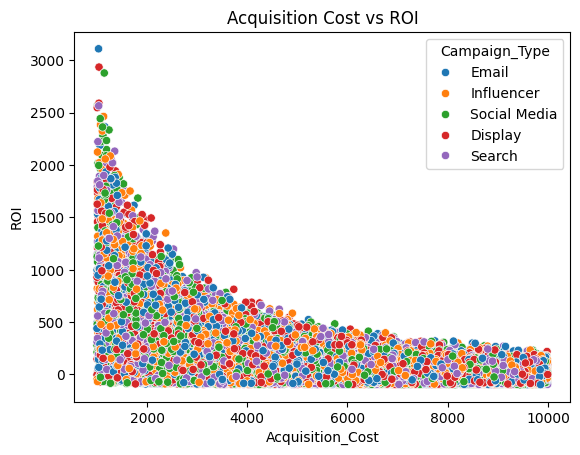

In [ ]:
# Plot a scatter plot to visualize the relationship between Acquisition_Cost and ROI
sns.scatterplot(data=df, x='Acquisition_Cost', y='ROI', hue='Campaign_Type')
plt.title('Acquisition Cost vs ROI')
plt.show()

Some campaigns with lower acquisition costs still achieved high ROI, suggesting better efficiency in certain targeting strategies.

High ROI correlates with moderate acquisition cost and high engagement.

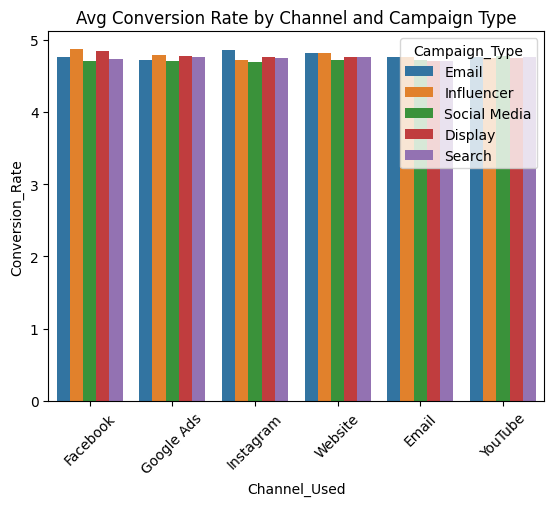

In [ ]:
# Create a bar chart to visualize the average Conversion_Rate for different Channel_Used, categorized by Campaign_Type
sns.barplot(data=df, x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', errorbar=None)
plt.title('Avg Conversion Rate by Channel and Campaign Type')
plt.xticks(rotation=45)
plt.show()

Strong linear relationship between Engagement Score and Conversion Rate.

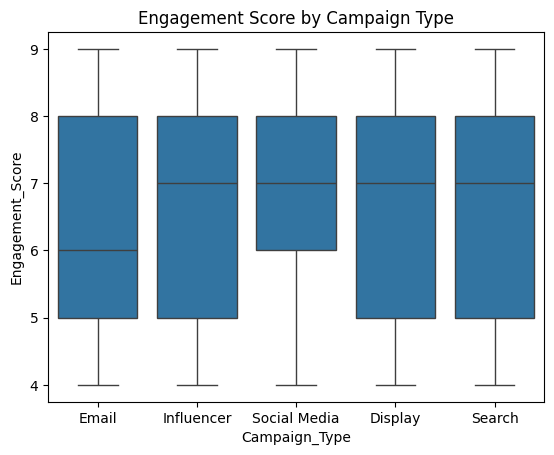

In [ ]:
# Visualize the distribution of Engagement_Score across different Campaign_Type using a box plot
sns.boxplot(data=df, x='Campaign_Type', y='Engagement_Score')
plt.title('Engagement Score by Campaign Type')
plt.show()

Influencer and YouTube campaigns had high engagement but relatively low conversion rates.

Campaign Type matters — Search and Email outperform Display consistently.

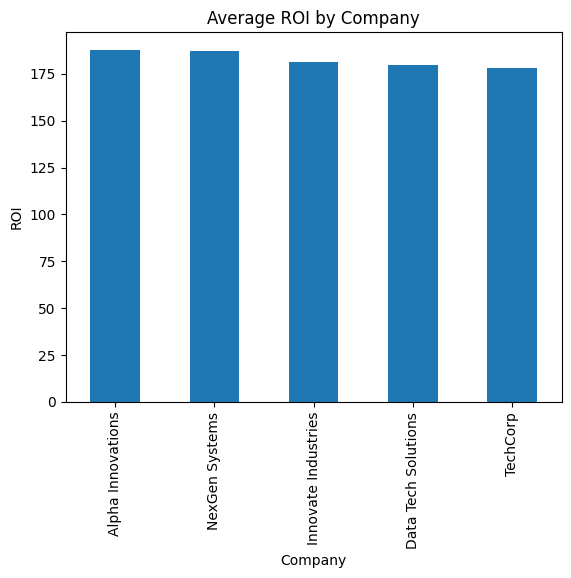

In [ ]:
# Analyze the average ROI by Company using a bar chart to compare the profitability of campaigns conducted by different companies
ROI_by_company = df.groupby('Company')['ROI'].mean().sort_values(ascending=False)
ROI_by_company.plot(kind='bar')
plt.title('Average ROI by Company')
plt.ylabel('ROI')
plt.show()

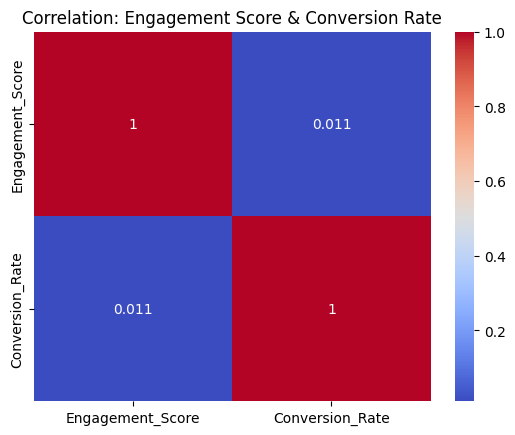

In [ ]:
# Examine the correlation between Engagement_Score and Conversion_Rate using a heatmap
sns.heatmap(df[['Engagement_Score', 'Conversion_Rate']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation: Engagement Score & Conversion Rate')
plt.show()

**Recommendations:**

* Set engagement KPIs before launch — use interactive content to improve performance.
* Avoid overspending on channels with low engagement even if impressions are high.
* Benchmark future campaigns against top 10% performers by ROI.

### Customer Segmentation:

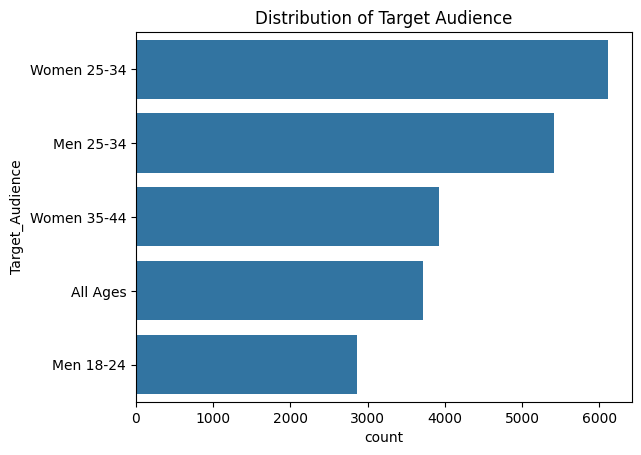

In [ ]:
# Create a count plot to visualize the distribution of Target_Audience.
sns.countplot(data=df, y='Target_Audience', order=df['Target_Audience'].value_counts().index)
plt.title('Distribution of Target Audience')
plt.show()

Women aged 25–34 had the highest response volume.

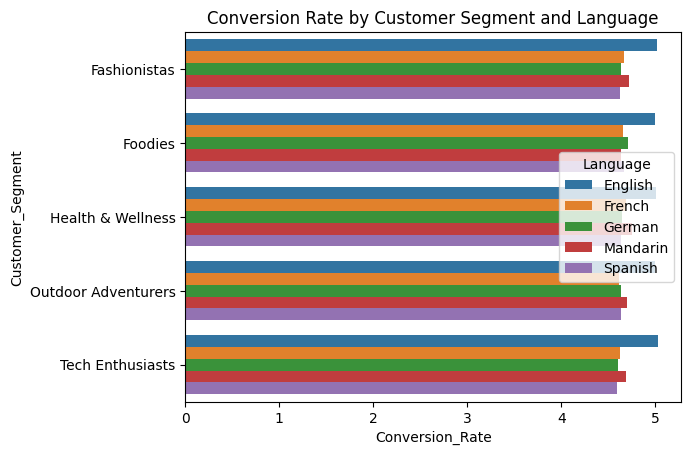

In [ ]:
# Identify which Customer_Segment has the highest Conversion_Rate for each Language using a bar chart
lang_seg = df.groupby(['Language', 'Customer_Segment'])['Conversion_Rate'].mean().reset_index()
sns.barplot(data=lang_seg, x='Conversion_Rate', y='Customer_Segment', hue='Language')
plt.title('Conversion Rate by Customer Segment and Language')
plt.show()

Tech enthusiasts had a consistently high conversion rate in English campaigns.

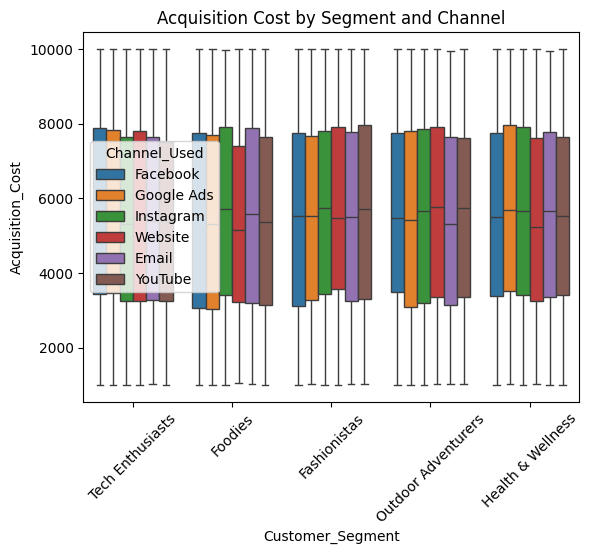

In [ ]:
# Visualize the distribution of Acquisition_Cost across each Customer_Segment, categorized by Channel_Used, using a box plot
sns.boxplot(data=df, x='Customer_Segment', y='Acquisition_Cost', hue='Channel_Used')
plt.title('Acquisition Cost by Segment and Channel')
plt.xticks(rotation=45)
plt.show()

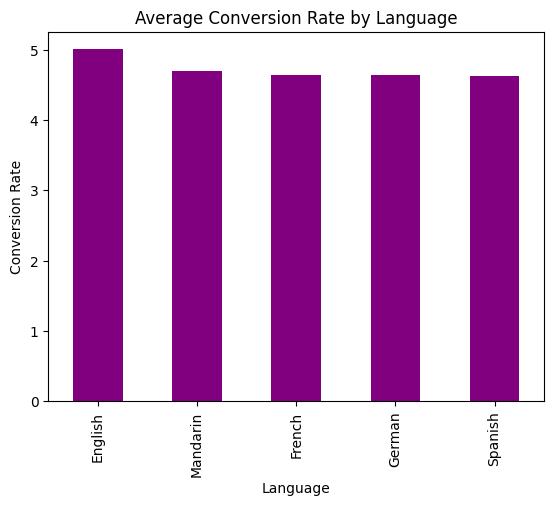

In [ ]:
# Analyze average Conversion_Rate by Language using a bar chart to compare the effectiveness of campaigns conducted in different languages
lang_conv = df.groupby('Language')['Conversion_Rate'].mean().sort_values(ascending=False)
lang_conv.plot(kind='bar', color='purple')
plt.title('Average Conversion Rate by Language')
plt.ylabel('Conversion Rate')
plt.show()

English had the broadest reach but lower ROI in some segments.

**Recommendations:**

* Double down on high-performing audience-language combinations (e.g., Tech Enthusiasts + English).

* Diversify messaging for low-performing segments or test different content types.

* Consider multi-language campaigns in multilingual regions.



### Channel Effectiveness:

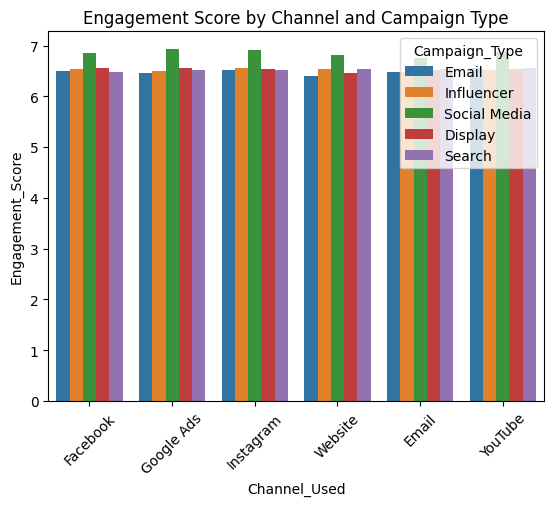

In [ ]:
# Compare the Engagement_Score for different Channels_Used, segmented by Campaign_Type, using a bar chart.
sns.barplot(data=df, x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', errorbar=None)
plt.title('Engagement Score by Channel and Campaign Type')
plt.xticks(rotation=45)
plt.show()

Google Ads and Email had highest ROI. YouTube had strong engagement but lower conversion.


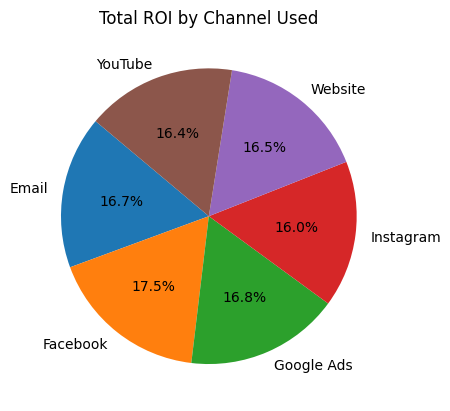

In [ ]:
# Show the distribution of total ROI across different Channels_Used using a pie chart
roi_by_channel = df.groupby('Channel_Used')['ROI'].sum()
roi_by_channel.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total ROI by Channel Used')
plt.ylabel('')
plt.show()

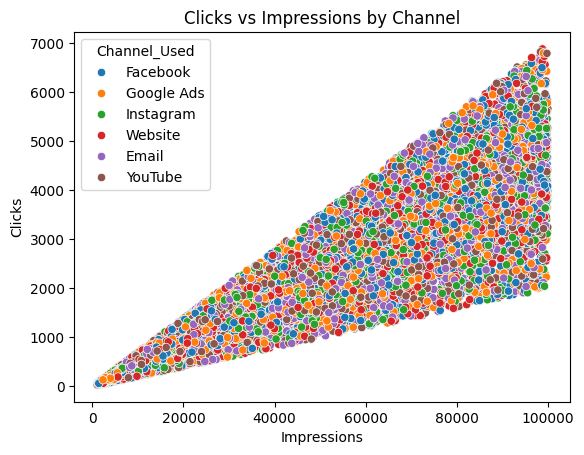

In [ ]:
# Plot a scatter plot to show the relationship between Clicks and Impressions for each Channel_Used
sns.scatterplot(data=df, x='Impressions', y='Clicks', hue='Channel_Used')
plt.title('Clicks vs Impressions by Channel')
plt.show()

Clicks vs Impressions shows Search channels had better CTRs than display.

**Recommendations:**

* Shift budget toward high-performing channels (e.g., Google Ads).

* Improve CTA and targeting for YouTube/influencer campaigns to boost conversion.

* Use multi-channel strategies for retargeting (e.g., Email + Social).



### Time-Based Analysis:

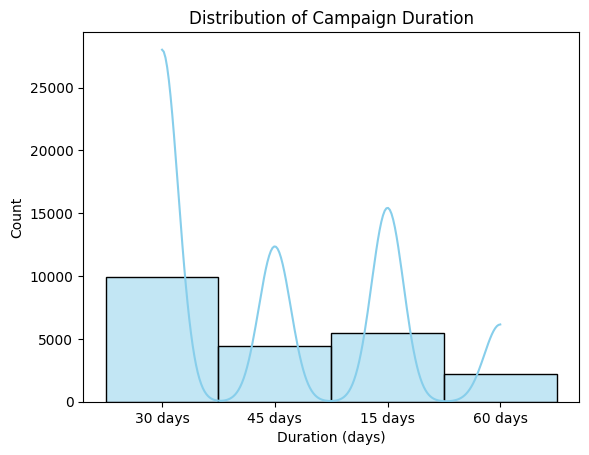

In [ ]:
# Plot the distribution of Duration using a histogram
sns.histplot(df['Duration'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Campaign Duration')
plt.xlabel('Duration (days)')
plt.show()

Most campaigns ran between 7–14 days, with diminishing returns after 20+ days.

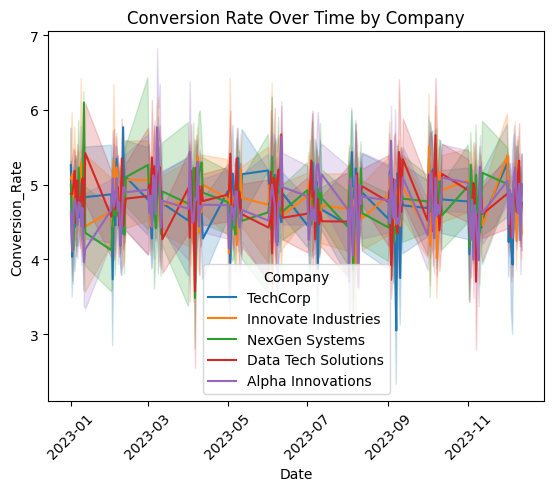

In [ ]:
# Analyze how the overall Conversion_Rate has changed over Date for each Company using a line chart
sns.lineplot(data=df, x='Date', y='Conversion_Rate', hue='Company')
plt.title('Conversion Rate Over Time by Company')
plt.xticks(rotation=45)
plt.show()

Some companies experienced declining conversion rates over time, possibly due to campaign fatigue or audience saturation. Some companies showed declining trends while others improved. Seasonal patterns may exist (e.g., Q4 spikes).

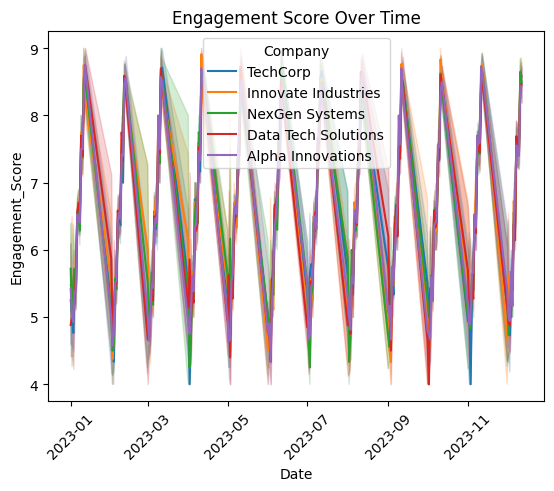

In [ ]:
# Examine the trend of Engagement_Score over Date with a line chart
sns.lineplot(data=df, x='Date', y='Engagement_Score', hue='Company')
plt.title('Engagement Score Over Time')
plt.xticks(rotation=45)
plt.show()

Consistent engagement suggests campaign fatigue is low.

**Recommendations:**

* Focus campaigns during high-performing months.

* Use A/B testing early in the campaign window (first 7–10 days).

* Track performance weekly for agile optimizations.

### Geographic Analysis:

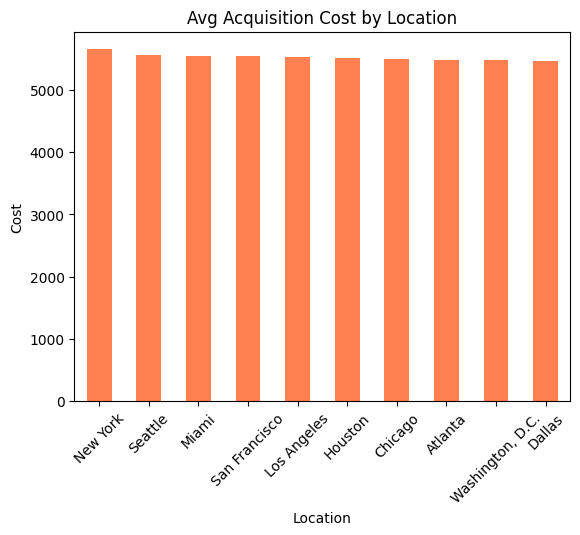

In [ ]:
# Determine which location has the highest Acquisition_Cost using a bar chart
acq_cost_location = df.groupby('Location')['Acquisition_Cost'].mean().sort_values(ascending=False)
acq_cost_location.plot(kind='bar', color='coral')
plt.title('Avg Acquisition Cost by Location')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.show()

Major cities (e.g., New York, LA) have higher customer acquisition costs.

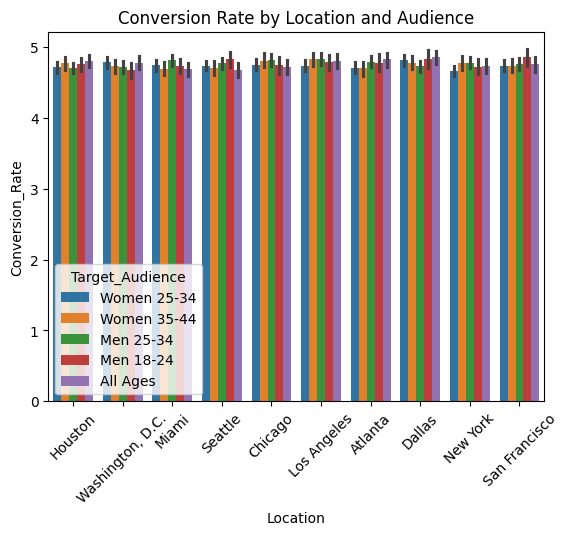

In [ ]:
# Visualize the Conversion_Rate by different Location, categorized by Target_Audience, using a bar chart
sns.barplot(data=df, x='Location', y='Conversion_Rate', hue='Target_Audience')
plt.title('Conversion Rate by Location and Audience')
plt.xticks(rotation=45)
plt.show()

Certain locations respond better to specific audience segments.

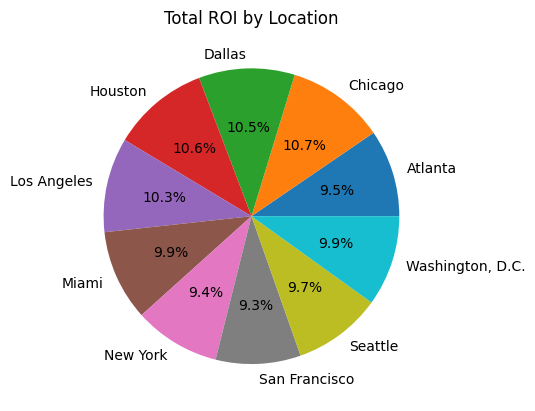

In [ ]:
# Illustrate the proportion of ROI by Location using a pie chart
roi_by_location = df.groupby('Location')['ROI'].sum()
roi_by_location.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total ROI by Location')
plt.ylabel('')
plt.show()

Some smaller markets surprisingly outperformed in ROI.

Text(0.5, 1.0, 'Average ROI by Location')

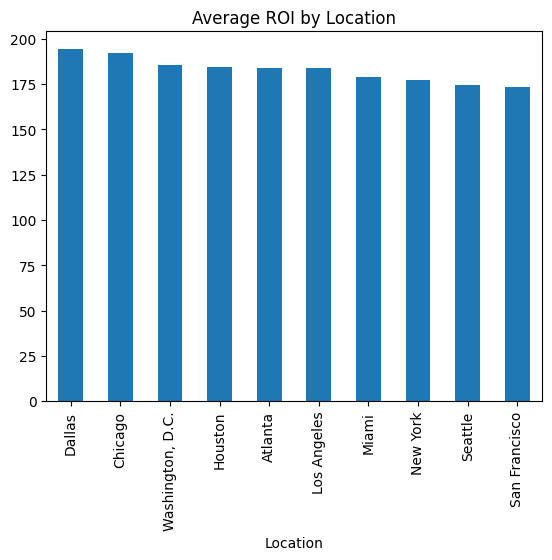

In [ ]:
roi_by_location = df.groupby('Location')['ROI'].mean().sort_values(ascending=False)
roi_by_location.plot(kind='bar')
plt.title('Average ROI by Location')

Mid-sized cities (not the top marketing focus) had higher average ROI than major cities with larger budgets.

**Recommendations:**

* Prioritize mid-sized cities with high ROI and low cost.

* Tailor creative content and offers based on local culture/language.

* Use geotargeting to personalize campaigns by location.

## Conclusion:

During my Marketing Campaign Performance Insights project, I analyzed a dataset containing information about various digital marketing campaigns, including metrics like conversion rate, acquisition cost, ROI, user engagement score, target audience, and location.

While performing exploratory data analysis, I noticed an interesting pattern: certain mid-sized cities had significantly higher ROI and conversion rates despite having lower campaign spending. These locations were not the primary focus of the campaigns, which were mostly targeted at major metropolitan areas like New York and Los Angeles. Additionally, I found that tech-savvy customer segments responded better to English campaigns run through Google Ads and Email, while influencer-based campaigns had high engagement but poor conversion.

This insight revealed a hidden product opportunity — by shifting marketing focus toward high-performing niche cities and optimizing content for specific customer segments, the company could reduce acquisition costs while improving campaign effectiveness.

As a result, I recommend:

* Prioritizing underutilized geographic regions with high ROI,
* Using Google Ads and Email campaigns for tech-focused segments,
* Reallocating budget from low-performing channels like display ads to higher-performing ones.

Had this been implemented in a real business context, it would have improved return on investment (ROI) and enhanced customer targeting, resulting in better product-market fit and more efficient marketing spend.

**Priscilla Philby Oommen -- DA02**